In [1]:
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
edgelist = pd.read_csv('travel.csv') 

In [3]:
edgelist.head(10)

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0
5,o_rs,y_rs,rs,0.12,red,0
6,y_rs,rs_end_south,rs,0.39,red,0
7,rc_end_north,v_rc,rc,0.70,red,0
8,v_rc,b_rc,rc,0.04,red,0
9,b_rc,g_rc,rc,0.15,red,0


In [4]:
nodelist = pd.read_csv('node.csv')

In [5]:
# Preview nodelist
nodelist.head(5)

,id,X,Y
0,b_bv,1486,732
1,b_bw,716,1357
2,b_end_east,3164,1111
3,b_end_west,141,1938
4,b_g,1725,771


In [6]:
# Create empty graph
g = nx.Graph()

In [7]:
# Add edges and edge attributes
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], **elrow[0:].to_dict())

In [8]:
# Edge list example
print(elrow[0:].to_dict())

{'node1': 'o_gy2', 'node2': 'y_gy2', 'trail': 'gy2', 'distance': 0.12, 'color': 'yellowgreen', 'estimate': 0}


In [9]:
# Add node attributes
for i, nlrow in nodelist.iterrows():
    g.node[nlrow['id']] = nlrow[1:].to_dict() 

In [10]:
# Node list example
print(nlrow)

id    y_rt
X      977
Y     1666
Name: 76, dtype: object


In [11]:
# Preview first 5 edges

g.edges(data=True)[0:5]  

[('rs_end_north',
  'v_rs',
  {'color': 'red',
   'distance': 0.3,
   'estimate': 0,
   'node1': 'rs_end_north',
   'node2': 'v_rs',
   'trail': 'rs'}),
 ('v_rs',
  'b_rs',
  {'color': 'red',
   'distance': 0.21,
   'estimate': 0,
   'node1': 'v_rs',
   'node2': 'b_rs',
   'trail': 'rs'}),
 ('v_rs',
  'v_bv',
  {'color': 'violet',
   'distance': 0.52,
   'estimate': 0,
   'node1': 'v_bv',
   'node2': 'v_rs',
   'trail': 'v'}),
 ('v_rs',
  'v_end_east',
  {'color': 'violet',
   'distance': 0.54,
   'estimate': 0,
   'node1': 'v_rs',
   'node2': 'v_end_east',
   'trail': 'v'}),
 ('b_rs',
  'g_rs',
  {'color': 'red',
   'distance': 0.11,
   'estimate': 0,
   'node1': 'b_rs',
   'node2': 'g_rs',
   'trail': 'rs'})]

In [12]:
print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))

# of edges: 123
# of nodes: 77


In [13]:
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in g.nodes(data=True)}

# Preview of node_positions 
dict(list(node_positions.items())[0:5])

{'b_rs': (1747, -700),
 'g_rs': (1676, -775),
 'rs_end_north': (1772, -172),
 'v_rs': (1793, -484),
 'w_rs': (1646, -947)}

In [14]:
# Define data structure (list) of edge colors for plotting

edge_colors = [e[2]['color'] for e in g.edges(data=True)]  


# Preview first 10
edge_colors[0:10]

['red',
 'red',
 'violet',
 'violet',
 'red',
 'blue',
 'blue',
 'red',
 'green',
 'green']

D:\Anaconda_new\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\Anaconda_new\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\Anaconda_new\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\Anaconda_new\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


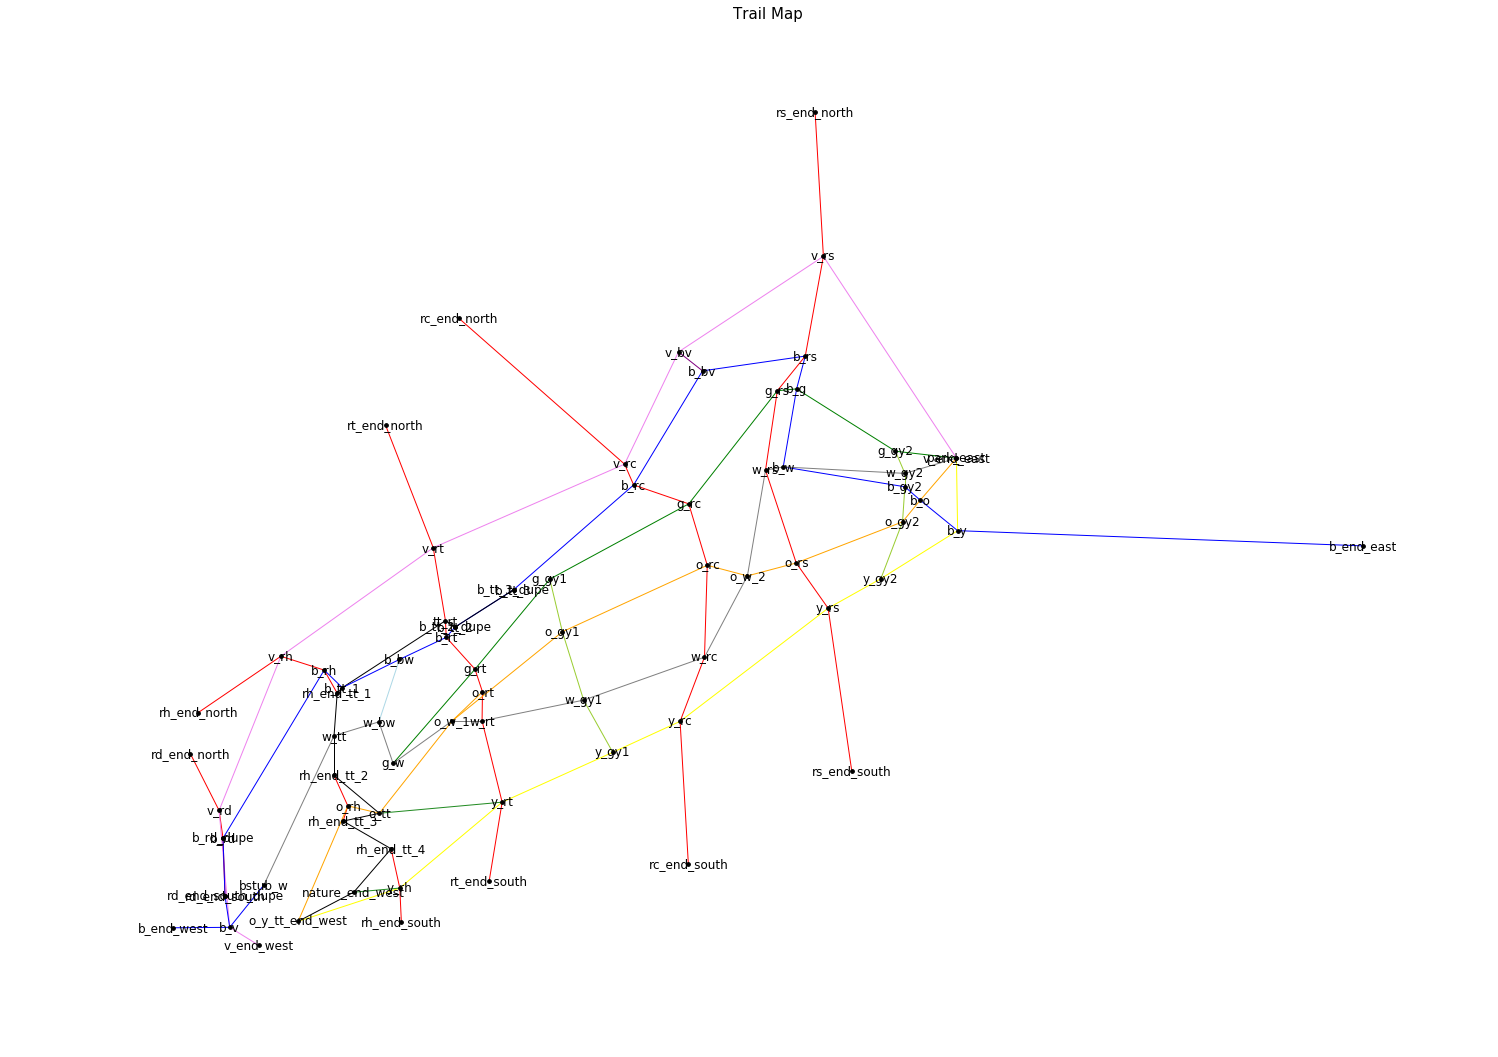

In [15]:
plt.figure(figsize=(20, 14))
nx.draw(g, pos=node_positions, edge_color=edge_colors, node_size=14, node_color='black', with_labels=True)
plt.title('Trail Map', size=15)
plt.show()

In [16]:
len(g.edges())

123

In [17]:
len(g.nodes())

77

In [18]:
g.edges()

[('rs_end_north', 'v_rs'),
 ('v_rs', 'b_rs'),
 ('v_rs', 'v_bv'),
 ('v_rs', 'v_end_east'),
 ('b_rs', 'g_rs'),
 ('b_rs', 'b_bv'),
 ('b_rs', 'b_g'),
 ('g_rs', 'w_rs'),
 ('g_rs', 'g_rc'),
 ('g_rs', 'b_g'),
 ('w_rs', 'o_rs'),
 ('w_rs', 'o_w_2'),
 ('w_rs', 'b_w'),
 ('o_rs', 'y_rs'),
 ('o_rs', 'o_w_2'),
 ('o_rs', 'o_gy2'),
 ('y_rs', 'rs_end_south'),
 ('y_rs', 'y_rc'),
 ('y_rs', 'y_gy2'),
 ('rc_end_north', 'v_rc'),
 ('v_rc', 'b_rc'),
 ('v_rc', 'v_rt'),
 ('v_rc', 'v_bv'),
 ('b_rc', 'g_rc'),
 ('b_rc', 'b_tt_3'),
 ('b_rc', 'b_bv'),
 ('g_rc', 'o_rc'),
 ('g_rc', 'g_gy1'),
 ('o_rc', 'w_rc'),
 ('o_rc', 'o_gy1'),
 ('o_rc', 'o_w_2'),
 ('w_rc', 'y_rc'),
 ('w_rc', 'w_gy1'),
 ('w_rc', 'o_w_2'),
 ('y_rc', 'rc_end_south'),
 ('y_rc', 'y_gy1'),
 ('rt_end_north', 'v_rt'),
 ('v_rt', 'tt_rt'),
 ('v_rt', 'v_rh'),
 ('tt_rt', 'b_rt'),
 ('tt_rt', 'b_tt_1'),
 ('tt_rt', 'b_tt_2'),
 ('b_rt', 'g_rt'),
 ('b_rt', 'b_bw'),
 ('b_rt', 'b_tt_2'),
 ('g_rt', 'o_rt'),
 ('g_rt', 'g_w'),
 ('g_rt', 'g_gy1'),
 ('o_rt', 'w_rt'),
 ('o

In [19]:
g.nodes()

['rs_end_north',
 'v_rs',
 'b_rs',
 'g_rs',
 'w_rs',
 'o_rs',
 'y_rs',
 'rs_end_south',
 'rc_end_north',
 'v_rc',
 'b_rc',
 'g_rc',
 'o_rc',
 'w_rc',
 'y_rc',
 'rc_end_south',
 'rt_end_north',
 'v_rt',
 'tt_rt',
 'b_rt',
 'g_rt',
 'o_rt',
 'w_rt',
 'y_rt',
 'rt_end_south',
 'rh_end_north',
 'v_rh',
 'b_rh',
 'rh_end_tt_1',
 'rh_end_tt_2',
 'o_rh',
 'rh_end_tt_3',
 'rh_end_tt_4',
 'y_rh',
 'rh_end_south',
 'rd_end_north',
 'v_rd',
 'b_rd',
 'rd_end_south',
 'v_end_west',
 'b_v',
 'v_bv',
 'v_end_east',
 'bstub_w',
 'b_end_west',
 'rd_end_south_dupe',
 'b_rd_dupe',
 'b_tt_1',
 'b_bw',
 'b_tt_2',
 'b_tt_3',
 'b_bv',
 'b_g',
 'b_w',
 'b_gy2',
 'b_o',
 'b_y',
 'b_end_east',
 'w_tt',
 'w_bw',
 'g_w',
 'o_w_1',
 'w_gy1',
 'o_w_2',
 'w_gy2',
 'park_east',
 'g_gy1',
 'g_gy2',
 'o_y_tt_end_west',
 'o_tt',
 'o_gy1',
 'o_gy2',
 'y_gy1',
 'y_gy2',
 'nature_end_west',
 'b_tt_2_dupe',
 'b_tt_3_dupe']

## Computing Neighbours

In [20]:
g.neighbors('g_gy1')


['g_rt', 'g_rc', 'o_gy1']

In [21]:
g.neighbors('rs_end_north')

['v_rs']

## Degree Centrality

In [22]:
#Degree Centrality
nx.degree_centrality(g)

{'b_bv': 0.039473684210526314,
 'b_bw': 0.039473684210526314,
 'b_end_east': 0.013157894736842105,
 'b_end_west': 0.013157894736842105,
 'b_g': 0.05263157894736842,
 'b_gy2': 0.05263157894736842,
 'b_o': 0.05263157894736842,
 'b_rc': 0.05263157894736842,
 'b_rd': 0.05263157894736842,
 'b_rd_dupe': 0.02631578947368421,
 'b_rh': 0.05263157894736842,
 'b_rs': 0.05263157894736842,
 'b_rt': 0.05263157894736842,
 'b_tt_1': 0.05263157894736842,
 'b_tt_2': 0.05263157894736842,
 'b_tt_2_dupe': 0.02631578947368421,
 'b_tt_3': 0.039473684210526314,
 'b_tt_3_dupe': 0.02631578947368421,
 'b_v': 0.06578947368421052,
 'b_w': 0.05263157894736842,
 'b_y': 0.05263157894736842,
 'bstub_w': 0.02631578947368421,
 'g_gy1': 0.039473684210526314,
 'g_gy2': 0.039473684210526314,
 'g_rc': 0.05263157894736842,
 'g_rs': 0.05263157894736842,
 'g_rt': 0.05263157894736842,
 'g_w': 0.039473684210526314,
 'nature_end_west': 0.039473684210526314,
 'o_gy1': 0.05263157894736842,
 'o_gy2': 0.05263157894736842,
 'o_rc': 0.

## Betweenness Centrality

In [23]:
nx.betweenness_centrality(g)

{'b_bv': 0.04841173184433313,
 'b_bw': 0.020601549409159516,
 'b_end_east': 0.0,
 'b_end_west': 0.0,
 'b_g': 0.09572140892063727,
 'b_gy2': 0.011769523908809946,
 'b_o': 0.004502392344497607,
 'b_rc': 0.1731988501082329,
 'b_rd': 0.05049480877181707,
 'b_rd_dupe': 0.006219908746224533,
 'b_rh': 0.07324379692450408,
 'b_rs': 0.0998167616759652,
 'b_rt': 0.0750995697300074,
 'b_tt_1': 0.04188704463389163,
 'b_tt_2': 0.050236092656153954,
 'b_tt_2_dupe': 0.006032163742690059,
 'b_tt_3': 0.04757569165364771,
 'b_tt_3_dupe': 0.005386800334168754,
 'b_v': 0.09832656283902821,
 'b_w': 0.0430948683155785,
 'b_y': 0.04106416259948115,
 'bstub_w': 0.07148631416290695,
 'g_gy1': 0.08460264181270381,
 'g_gy2': 0.047164643601099884,
 'g_rc': 0.21875285587687138,
 'g_rs': 0.13490361085321576,
 'g_rt': 0.09860436668954614,
 'g_w': 0.046404565761290956,
 'nature_end_west': 0.00017543859649122806,
 'o_gy1': 0.10559211620165283,
 'o_gy2': 0.02988850033331507,
 'o_rc': 0.12246038549262239,
 'o_rh': 0.038

## Computing Odd Degree Nodes

In [24]:
# Calculate list of nodes with odd degree
nodes_odd_degree = [v for v, d in g.degree_iter() if d % 2 == 1]  


In [25]:
# Counts
print('Number of nodes of odd degree: {}'.format(len(nodes_odd_degree)))
print('Number of total nodes: {}'.format(len(g.nodes())))

Number of nodes of odd degree: 36
Number of total nodes: 77


In [26]:
# Compute all pairs of odd nodes. in a list of tuples
odd_node_pairs = list(itertools.combinations(nodes_odd_degree, 2))

In [27]:
# Counts
print('Number of pairs: {}'.format(len(odd_node_pairs)))

Number of pairs: 630


## Applying Dijkstra's Theorem

In [28]:
def get_shortest_paths_distances(graph, pairs, edge_weight_name):
    distances = {}
    for pair in pairs:
        distances[pair] = nx.dijkstra_path_length(graph, pair[0], pair[1], weight=edge_weight_name)
    return distances

In [29]:
odd_node_pairs_shortest_paths = get_shortest_paths_distances(g, odd_node_pairs, 'distance')
dict(list(odd_node_pairs_shortest_paths.items())[0:10])

{('rs_end_north', 'o_rt'): 1.75,
 ('rs_end_north', 'rc_end_north'): 1.79,
 ('rs_end_north', 'rc_end_south'): 1.79,
 ('rs_end_north', 'rh_end_north'): 2.2700000000000005,
 ('rs_end_north', 'rh_end_tt_1'): 2.06,
 ('rs_end_north', 'rh_end_tt_2'): 2.2,
 ('rs_end_north', 'rs_end_south'): 1.52,
 ('rs_end_north', 'rt_end_north'): 1.8900000000000001,
 ('rs_end_north', 'rt_end_south'): 2.1,
 ('rs_end_north', 'y_rt'): 1.9200000000000002}

In [30]:
def create_complete_graph(pair_weights, flip_weights=True):
    """
    Create a completely connected graph using a list of vertex pairs and the shortest path distances between them
    Parameters: 
        pair_weights: list[tuple] from the output of get_shortest_paths_distances
        flip_weights: Boolean. Should we negate the edge attribute in pair_weights?
    """
    g = nx.Graph()
    for k, v in pair_weights.items():
        wt_i = - v if flip_weights else v
        g.add_edge(k[0], k[1], {'distance': v, 'weight': wt_i})  
    return g

In [31]:
# Generate the complete graph
g_odd_complete = create_complete_graph(odd_node_pairs_shortest_paths, flip_weights=True)

# Counts
print('Number of nodes: {}'.format(len(g_odd_complete.nodes())))
print('Number of edges: {}'.format(len(g_odd_complete.edges())))

Number of nodes: 36
Number of edges: 630


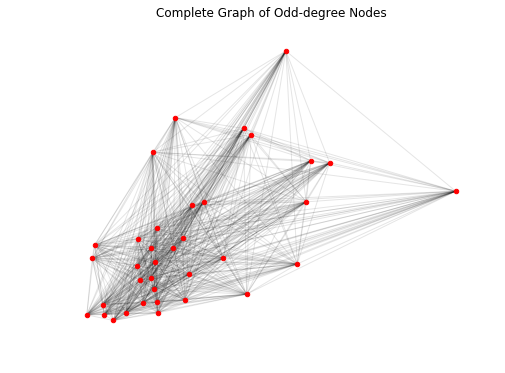

In [32]:
# Plot the complete graph of odd-degree nodes
plt.figure(figsize=(8, 6))
pos_random = nx.random_layout(g_odd_complete)
nx.draw_networkx_nodes(g_odd_complete, node_positions, node_size=20, node_color="red")
nx.draw_networkx_edges(g_odd_complete, node_positions, alpha=0.1)
plt.axis('off')
plt.title('Complete Graph of Odd-degree Nodes')
plt.show()

## Min Weight Matching

In [33]:
odd_matching_dupes = nx.algorithms.max_weight_matching(g_odd_complete, True)

In [34]:
# Convert matching to list of deduped tuples
odd_matching = list(pd.unique([tuple(sorted([k, v])) for k, v in odd_matching_dupes.items()]))

# Counts
print('Number of edges in matching (deduped): {}'.format(len(odd_matching)))

Number of edges in matching (deduped): 18


D:\Anaconda_new\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\Anaconda_new\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\Anaconda_new\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\Anaconda_new\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


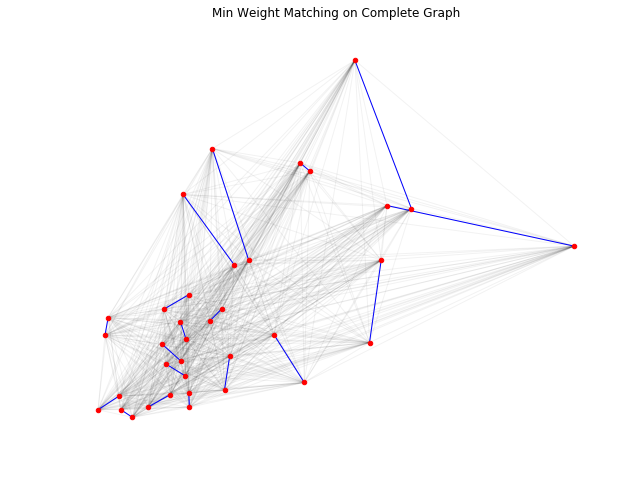

In [35]:
plt.figure(figsize=(8, 6))

# Plot the complete graph of odd-degree nodes
nx.draw(g_odd_complete, pos=node_positions, node_size=20, alpha=0.05)

# Create a new graph to overlay on g_odd_complete with just the edges from the min weight matching
g_odd_complete_min_edges = nx.Graph(odd_matching)
nx.draw(g_odd_complete_min_edges, pos=node_positions, node_size=20, edge_color='blue', node_color='red')

plt.title('Min Weight Matching on Complete Graph')
plt.show()

D:\Anaconda_new\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\Anaconda_new\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\Anaconda_new\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\Anaconda_new\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


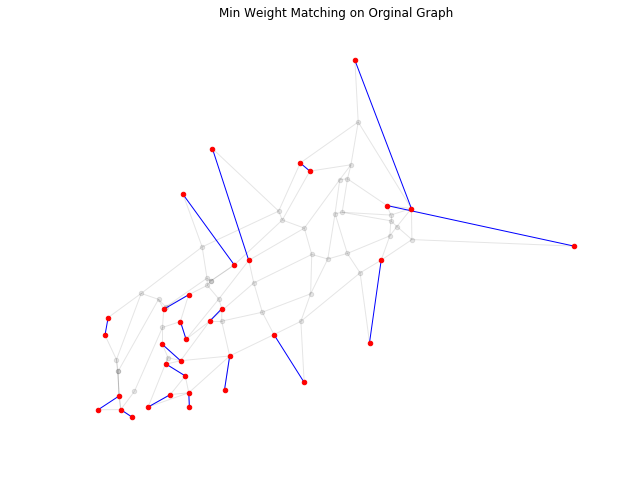

In [36]:
plt.figure(figsize=(8, 6))

# Plot the original trail map graph
nx.draw(g, pos=node_positions, node_size=20, alpha=0.1, node_color='black')

# Plot graph to overlay with just the edges from the min weight matching
nx.draw(g_odd_complete_min_edges, pos=node_positions, node_size=20, alpha=1, node_color='red', edge_color='blue')

plt.title('Min Weight Matching on Orginal Graph')
plt.show()

In [37]:
def add_augmenting_path_to_graph(graph, min_weight_pairs):
    """
    Add the min weight matching edges to the original graph
    Parameters:
        graph: NetworkX graph (original graph from trailmap)
        min_weight_pairs: list[tuples] of node pairs from min weight matching
    Returns:
        augmented NetworkX graph
    """
    
    # We need to make the augmented graph a MultiGraph so we can add parallel edges
    graph_aug = nx.MultiGraph(graph.copy())
    for pair in min_weight_pairs:
        graph_aug.add_edge(pair[0], 
                           pair[1], 
                           **{'distance': nx.dijkstra_path_length(graph, pair[0], pair[1]), 'trail': 'augmented'}
                           # attr_dict={'distance': nx.dijkstra_path_length(graph, pair[0], pair[1]),
                           #            'trail': 'augmented'}  # deprecated after 1.11
                          )
    return graph_aug

In [38]:
# Create augmented graph: add the min weight matching edges to g
g_aug = add_augmenting_path_to_graph(g, odd_matching)

# Counts
print('Number of edges in original graph: {}'.format(len(g.edges())))
print('Number of edges in augmented graph: {}'.format(len(g_aug.edges())))

Number of edges in original graph: 123
Number of edges in augmented graph: 141


In [39]:
pd.value_counts(g_aug.degree()) 

4    54
2    18
6     5
dtype: int64

# Step 3: Compute Eulerian Circuit

In [40]:
naive_euler_circuit = list(nx.eulerian_circuit(g_aug, source='b_end_east'))

In [41]:
print('Length of eulerian circuit: {}'.format(len(naive_euler_circuit)))

Length of eulerian circuit: 141


In [42]:
# Preview naive Euler circuit
naive_euler_circuit[0:10]

[('b_end_east', 'g_gy2'),
 ('g_gy2', 'park_east'),
 ('park_east', 'b_y'),
 ('b_y', 'y_gy2'),
 ('y_gy2', 'rs_end_south'),
 ('rs_end_south', 'y_rs'),
 ('y_rs', 'y_gy2'),
 ('y_gy2', 'o_gy2'),
 ('o_gy2', 'b_o'),
 ('b_o', 'park_east')]

## Correct Circuit

In [43]:
def create_eulerian_circuit(graph_augmented, graph_original, starting_node=None):
    """Create the eulerian path using only edges from the original graph."""
    euler_circuit = []
    naive_circuit = list(nx.eulerian_circuit(graph_augmented, source=starting_node))
    
    for edge in naive_circuit:
        edge_data = graph_augmented.get_edge_data(edge[0], edge[1])    
        
        if edge_data[0]['trail'] != 'augmented':
            # If `edge` exists in original graph, grab the edge attributes and add to eulerian circuit.
            edge_att = graph_original[edge[0]][edge[1]]
            euler_circuit.append((edge[0], edge[1], edge_att)) 
        else: 
            aug_path = nx.shortest_path(graph_original, edge[0], edge[1], weight='distance')
            aug_path_pairs = list(zip(aug_path[:-1], aug_path[1:]))
            
            print('Filling in edges for augmented edge: {}'.format(edge))
            print('Augmenting path: {}'.format(' => '.join(aug_path)))
            print('Augmenting path pairs: {}\n'.format(aug_path_pairs))
            
            # If `edge` does not exist in original graph, find the shortest path between its nodes and 
            #  add the edge attributes for each link in the shortest path.
            for edge_aug in aug_path_pairs:
                edge_aug_att = graph_original[edge_aug[0]][edge_aug[1]]
                euler_circuit.append((edge_aug[0], edge_aug[1], edge_aug_att))
                                      
    return euler_circuit

In [44]:
# Create the Eulerian circuit
euler_circuit = create_eulerian_circuit(g_aug, g, 'b_end_east')

Filling in edges for augmented edge: ('b_end_east', 'g_gy2')
Augmenting path: b_end_east => b_y => b_o => b_gy2 => w_gy2 => g_gy2
Augmenting path pairs: [('b_end_east', 'b_y'), ('b_y', 'b_o'), ('b_o', 'b_gy2'), ('b_gy2', 'w_gy2'), ('w_gy2', 'g_gy2')]

Filling in edges for augmented edge: ('y_gy2', 'rs_end_south')
Augmenting path: y_gy2 => y_rs => rs_end_south
Augmenting path pairs: [('y_gy2', 'y_rs'), ('y_rs', 'rs_end_south')]

Filling in edges for augmented edge: ('y_gy1', 'rc_end_south')
Augmenting path: y_gy1 => y_rc => rc_end_south
Augmenting path pairs: [('y_gy1', 'y_rc'), ('y_rc', 'rc_end_south')]

Filling in edges for augmented edge: ('b_end_west', 'rd_end_south')
Augmenting path: b_end_west => b_v => rd_end_south
Augmenting path pairs: [('b_end_west', 'b_v'), ('b_v', 'rd_end_south')]

Filling in edges for augmented edge: ('b_bw', 'rh_end_tt_1')
Augmenting path: b_bw => b_tt_1 => rh_end_tt_1
Augmenting path pairs: [('b_bw', 'b_tt_1'), ('b_tt_1', 'rh_end_tt_1')]

Filling in edges

In [45]:
print('Length of Eulerian circuit: {}'.format(len(euler_circuit)))

Length of Eulerian circuit: 158


## Best Strategy Directions Eularian Circuit

In [46]:
# Preview first 20 directions 
for i, edge in enumerate(euler_circuit[0:20]):
    print(i, edge)

0 ('b_end_east', 'b_y', {'node1': 'b_y', 'node2': 'b_end_east', 'trail': 'b', 'distance': 1.32, 'color': 'blue', 'estimate': 0})
1 ('b_y', 'b_o', {'node1': 'b_o', 'node2': 'b_y', 'trail': 'b', 'distance': 0.08, 'color': 'blue', 'estimate': 0})
2 ('b_o', 'b_gy2', {'node1': 'b_gy2', 'node2': 'b_o', 'trail': 'b', 'distance': 0.05, 'color': 'blue', 'estimate': 1})
3 ('b_gy2', 'w_gy2', {'node1': 'w_gy2', 'node2': 'b_gy2', 'trail': 'gy2', 'distance': 0.03, 'color': 'yellowgreen', 'estimate': 1})
4 ('w_gy2', 'g_gy2', {'node1': 'g_gy2', 'node2': 'w_gy2', 'trail': 'gy2', 'distance': 0.05, 'color': 'yellowgreen', 'estimate': 0})
5 ('g_gy2', 'park_east', {'node1': 'g_gy2', 'node2': 'park_east', 'trail': 'g', 'distance': 0.14, 'color': 'green', 'estimate': 0})
6 ('park_east', 'b_y', {'node1': 'b_y', 'node2': 'park_east', 'trail': 'y', 'distance': 0.14, 'color': 'yellow', 'estimate': 0})
7 ('b_y', 'y_gy2', {'node1': 'y_gy2', 'node2': 'b_y', 'trail': 'y', 'distance': 0.28, 'color': 'yellow', 'estima

## Hiking Circuit Details

In [47]:
# Computing some stats
total_mileage_of_circuit = sum([edge[2]['distance'] for edge in euler_circuit])
total_mileage_on_orig_trail_map = sum(nx.get_edge_attributes(g, 'distance').values())
_vcn = pd.value_counts(pd.value_counts([(e[0]) for e in euler_circuit]), sort=False)
node_visits = pd.DataFrame({'n_visits': _vcn.index, 'n_nodes': _vcn.values})
_vce = pd.value_counts(pd.value_counts([sorted(e)[0] + sorted(e)[1] for e in nx.MultiDiGraph(euler_circuit).edges()]))
edge_visits = pd.DataFrame({'n_visits': _vce.index, 'n_edges': _vce.values})

# Printing stats
print('Mileage of circuit: {0:.2f}'.format(total_mileage_of_circuit))
print('Mileage on original trail map: {0:.2f}'.format(total_mileage_on_orig_trail_map))
print('Mileage retracing edges: {0:.2f}'.format(total_mileage_of_circuit-total_mileage_on_orig_trail_map))
print('Percent of mileage retraced: {0:.2f}%\n'.format((1-total_mileage_of_circuit/total_mileage_on_orig_trail_map)*-100))

print('Number of edges in circuit: {}'.format(len(euler_circuit)))
print('Number of edges in original graph: {}'.format(len(g.edges())))
print('Number of nodes in original graph: {}\n'.format(len(g.nodes())))

print('Number of edges traversed more than once: {}\n'.format(len(euler_circuit)-len(g.edges())))  

print('Number of times visiting each node:')
print(node_visits.to_string(index=False))

print('\nNumber of times visiting each edge:')
print(edge_visits.to_string(index=False))

Mileage of circuit: 33.59
Mileage on original trail map: 25.76
Mileage retracing edges: 7.83
Percent of mileage retraced: 30.40%

Number of edges in circuit: 158
Number of edges in original graph: 123
Number of nodes in original graph: 77

Number of edges traversed more than once: 35

Number of times visiting each node:
n_nodes  n_visits
     18         1
     38         2
     20         3
      1         4

Number of times visiting each edge:
n_edges  n_visits
     88         1
     35         2


In [48]:
def create_cpp_edgelist(euler_circuit):
    """
    Create the edgelist without parallel edge for the visualization
    Combine duplicate edges and keep track of their sequence and # of walks
    Parameters:
        euler_circuit: list[tuple] from create_eulerian_circuit
    """
    cpp_edgelist = {}

    for i, e in enumerate(euler_circuit):
        edge = frozenset([e[0], e[1]])

        if edge in cpp_edgelist:
            cpp_edgelist[edge][2]['sequence'] += ', ' + str(i)
            cpp_edgelist[edge][2]['visits'] += 1

        else:
            cpp_edgelist[edge] = e
            cpp_edgelist[edge][2]['sequence'] = str(i)
            cpp_edgelist[edge][2]['visits'] = 1
        
    return list(cpp_edgelist.values())

In [49]:
cpp_edgelist = create_cpp_edgelist(euler_circuit)

In [50]:
print('Number of edges in CPP edge list: {}'.format(len(cpp_edgelist)))

Number of edges in CPP edge list: 123


In [51]:
# Preview CPP plot-friendly edge list
cpp_edgelist[0:3]

[('b_end_east',
  'b_y',
  {'color': 'blue',
   'distance': 1.32,
   'estimate': 0,
   'node1': 'b_y',
   'node2': 'b_end_east',
   'sequence': '0, 157',
   'trail': 'b',
   'visits': 2}),
 ('b_y',
  'b_o',
  {'color': 'blue',
   'distance': 0.08,
   'estimate': 0,
   'node1': 'b_o',
   'node2': 'b_y',
   'sequence': '1, 156',
   'trail': 'b',
   'visits': 2}),
 ('b_o',
  'b_gy2',
  {'color': 'blue',
   'distance': 0.05,
   'estimate': 1,
   'node1': 'b_gy2',
   'node2': 'b_o',
   'sequence': '2, 155',
   'trail': 'b',
   'visits': 2})]

In [52]:
# Create CPP solution graph
g_cpp = nx.Graph(cpp_edgelist)

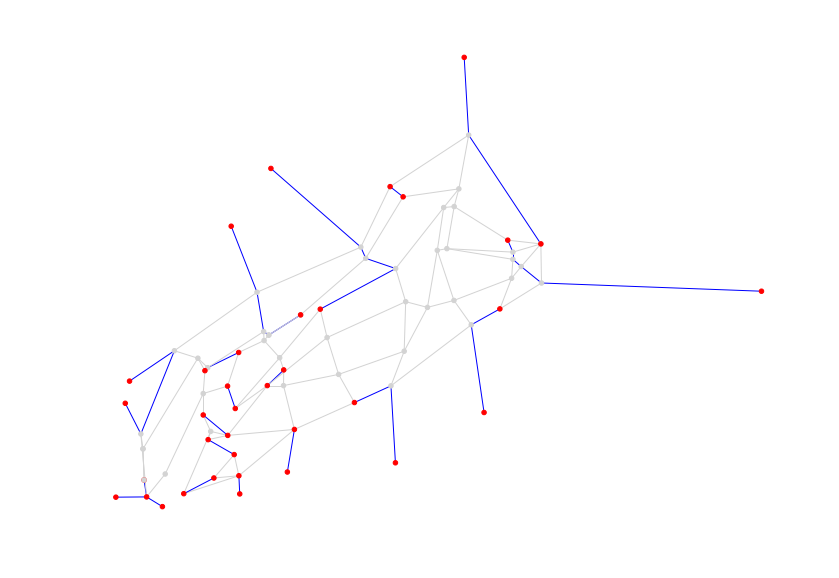

In [53]:
plt.figure(figsize=(14, 10))

visit_colors = {1:'lightgray', 2:'blue'}
edge_colors = [visit_colors[e[2]['visits']] for e in g_cpp.edges(data=True)]
node_colors = ['red'  if node in nodes_odd_degree else 'lightgray' for node in g_cpp.nodes()]

nx.draw_networkx(g_cpp, pos=node_positions, node_size=20, node_color=node_colors, edge_color=edge_colors, with_labels=False)
plt.axis('off')
plt.show()

## Eularian Map with directions sequenced 

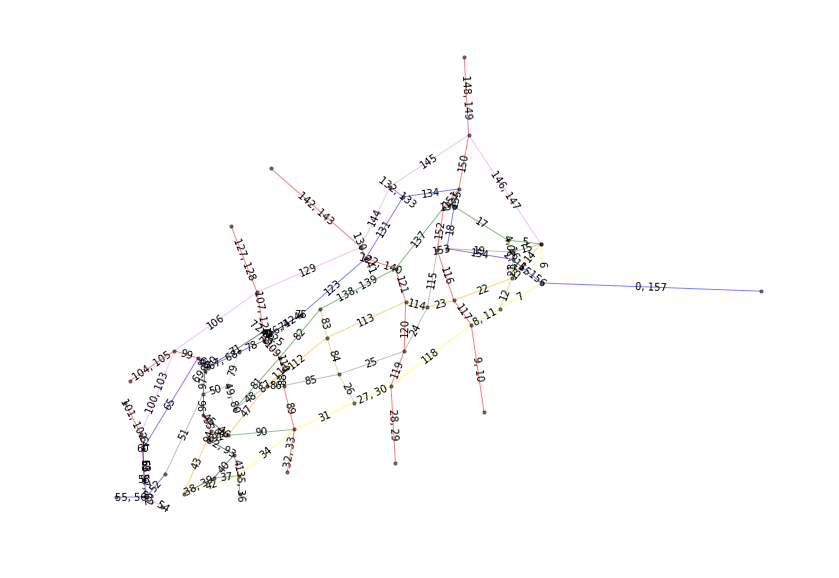

In [54]:
plt.figure(figsize=(14, 10))

edge_colors = [e[2]['color'] for e in g_cpp.edges(data=True)]
nx.draw_networkx(g_cpp, pos=node_positions, node_size=10, node_color='black', edge_color=edge_colors, with_labels=False, alpha=0.5)

bbox = {'ec':[1,1,1,0], 'fc':[1,1,1,0]}  # hack to label edges over line (rather than breaking up line)
edge_labels = nx.get_edge_attributes(g_cpp, 'sequence')
nx.draw_networkx_edge_labels(g_cpp, pos=node_positions, edge_labels=edge_labels, bbox=bbox, font_size=10)

plt.axis('off')
plt.show()

## Visulaization Movie

In [55]:
visit_colors = {1:'black', 2:'red'}
edge_cnter = {}
g_i_edge_colors = []
for i, e in enumerate(euler_circuit, start=1):

    edge = frozenset([e[0], e[1]])
    if edge in edge_cnter:
        edge_cnter[edge] += 1
    else:
        edge_cnter[edge] = 1

    # Full graph (faded in background)
    nx.draw_networkx(g_cpp, pos=node_positions, node_size=6, node_color='gray', with_labels=False, alpha=0.07)

    # Edges walked as of iteration i
    euler_circuit_i = copy.deepcopy(euler_circuit[0:i])
    for i in range(len(euler_circuit_i)):
        edge_i = frozenset([euler_circuit_i[i][0], euler_circuit_i[i][1]])
        euler_circuit_i[i][2]['visits_i'] = edge_cnter[edge_i]
    g_i = nx.Graph(euler_circuit_i)
    g_i_edge_colors = [visit_colors[e[2]['visits_i']] for e in g_i.edges(data=True)]

    nx.draw_networkx_nodes(g_i, pos=node_positions, node_size=6, alpha=0.6, node_color='lightgray', with_labels=False, linewidths=0.1)
    nx.draw_networkx_edges(g_i, pos=node_positions, edge_color=g_i_edge_colors, alpha=0.8)

    plt.axis('off')
    plt.savefig('fig/png/img{}.png'.format(i), dpi=120, bbox_inches='tight')
    plt.close()

In [56]:
import glob
import numpy as np
import imageio
import os

def make_circuit_video(image_path, movie_filename, fps=5):
    # sorting filenames in order
    filenames = glob.glob(image_path + 'img*.png')
    filenames_sort_indices = np.argsort([int(os.path.basename(filename).split('.')[0][3:]) for filename in filenames])
    filenames = [filenames[i] for i in filenames_sort_indices]

    # make movie
    with imageio.get_writer(movie_filename, mode='I', fps=fps) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

make_circuit_video('fig/png/', 'fig/gif/cpp_route_animation.gif', fps=3)